In [27]:
from __future__ import print_function
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adadelta
%matplotlib inline

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(y_train[0])

5


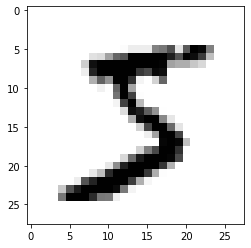

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [10]:
batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
# Model 1

In [19]:

model = Sequential()
model.add(Conv2D(100, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(),
              metrics=['accuracy'])


In [21]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/3
469/469 [==============================] - 102s 214ms/step - loss: 0.4727 - accuracy: 0.8527 - val_loss: 0.0780 - val_accuracy: 0.9764
Epoch 2/3
469/469 [==============================] - 100s 212ms/step - loss: 0.1841 - accuracy: 0.9464 - val_loss: 0.0565 - val_accuracy: 0.9817
Epoch 3/3
469/469 [==============================] - 100s 214ms/step - loss: 0.1420 - accuracy: 0.9588 - val_loss: 0.0406 - val_accuracy: 0.9858


In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 0.04063258320093155
Test accuracy: 0.98580002784729


In [23]:
# Model 2

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [40]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/3
469/469 [==============================] - 88s 185ms/step - loss: 0.2324 - accuracy: 0.9308 - val_loss: 0.0515 - val_accuracy: 0.9829
Epoch 2/3
469/469 [==============================] - 87s 185ms/step - loss: 0.0806 - accuracy: 0.9758 - val_loss: 0.0402 - val_accuracy: 0.9867
Epoch 3/3
469/469 [==============================] - 100s 213ms/step - loss: 0.0607 - accuracy: 0.9824 - val_loss: 0.0337 - val_accuracy: 0.9893


In [42]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 0.0336780846118927
Test accuracy: 0.989300012588501


In [32]:
#Model 3

In [33]:
model = Sequential()
model.add(Conv2D(150, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(75, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [35]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/3
469/469 [==============================] - 303s 643ms/step - loss: 0.3700 - accuracy: 0.8864 - val_loss: 0.0705 - val_accuracy: 0.9791
Epoch 2/3
469/469 [==============================] - 301s 643ms/step - loss: 0.1456 - accuracy: 0.9555 - val_loss: 0.0563 - val_accuracy: 0.9822
Epoch 3/3
469/469 [==============================] - 303s 646ms/step - loss: 0.1069 - accuracy: 0.9686 - val_loss: 0.0485 - val_accuracy: 0.9856


In [37]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 0.048462461680173874
Test accuracy: 0.9855999946594238


#### From the above, We can see that the model 2 performs better when compared to the other models. I think it is due to the presence of another convolution layer. 

# Question 3

The main reason behind CNN is feature engineering not required. Before CNN, we need to spend so much time on feature selection ( algorithm for features extraction). When we compare handcrafted features with CNN, CNN performance well and it gives better accuracy. It is covering local and global features. It also learns different features from images.

In algorithm based image classification, we need to select the features(local, global) and classifiers. In some cases, global features worked well and in some cases, local features worked well.

When compared to CNN and DNN as we compared above we can see that CNN works better than the DNN.

When we use the Branching/Merging CNN + Homogeneous Vector Capsules worked better for mnist dataset where we got the best accuracy 99.87.